In [106]:
arg="-d cifar10 --rf_type ccf --n_jobs 20 --criterion entropy --soft_pred --n_estimators 65 --max_depth 27 --min_samples_split 2 --min_samples_leaf 56 --min_impurity_decrease 2.07e-14 -V"
# arg="-S -d mnist --max_depth 10 --random_state 0 --min_samples_leaf 3 --min_samples_split 10 --max_features 0.7"
# arg = "-pDV -d test --rf_type rf --max_features 1.0 --n_estimators 1 --max_depth 8 --bootstrap False"
# arg="-SV -d mnist --n_jobs 30 --soft_pred --criterion gini --n_estimators 69 --max_depth 18 --min_samples_split 1 --min_samples_leaf 9 --min_impurity_decrease 1.347e-07"
# arg="-DV -d mnist --criterion entropy --n_estimators 100 --max_depth 10 --min_samples_leaf 3 --min_samples_split 8 --max_samples 0.7"

In [107]:
# Import Packages

import logging
import argparse
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from model import *

logging.basicConfig(filename='output.log',level=logging.INFO, format='%(asctime)s [%(levelname)s]: %(message)s')
logging.info(f'-----------------------------\nStart of running with arguments: (\"{arg}\")')

In [108]:
## Set Config

config = parse(arg)
model_config = get_model_config(config)

info = f"Config: {vars(config)}"
logging.info(info)
if config.verbose:
    print(info)


Config: {'verbose': True, 'debug': False, 'sklearn': False, 'parallel': True, 'save': './save', 'dataset': 'cifar10', 'val_ratio': 0.1, 'rf_type': 'ccf', 'n_jobs': 20, 'soft_pred': True, 'criterion': 'entropy', 'n_estimators': 65, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 56, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 2.07e-14, 'bootstrap': True, 'projection_bootstrap': True, 'oob_score': False, 'ccp_alpha': 0.0, 'max_samples': None}


In [109]:
# Load Dataset

dataset,dataset_shape = get_dataset(config)
train_dataset,val_dataset,test_dataset = split_dataset(dataset,config.val_ratio)

if config.verbose:
    for term in [train_dataset,val_dataset,test_dataset]:
        print(term[0].shape,term[1].shape)
    if not config.dataset == "test":
        # show_images(*val_dataset,dataset_shape)
        pass
    else:
        print(val_dataset[1][:10])
        plot_test(*train_dataset)

(4500, 3072) (4500, 1)
(500, 3072) (500, 1)
(1000, 3072) (1000, 1)


In [91]:
# Train Model

model = get_model(config,model_config)

train_model(config,model,train_dataset,val_dataset)

Creating the CCF!
train_images: (4500, 3072), train_labels: (4500, 1)


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


Creating the 1/60 CCF Base Decision Tree
Creating the 25/60 CCF Base Decision Tree
Creating the 13/60 CCF Base Decision Tree
Finish Creating the 1/60 CCF Base Decision Tree with depth 7
 time per tree: 15.936 s
Creating the 37/60 CCF Base Decision Tree
Finish Creating the 13/60 CCF Base Decision Tree with depth 7
 time per tree: 24.666 s
Creating the 49/60 CCF Base Decision Tree
Finish Creating the 25/60 CCF Base Decision Tree with depth 9
 time per tree: 28.201 s
Finish Creating the 37/60 CCF Base Decision Tree with depth 6
 time per tree: 19.597 s
Finish Creating the 49/60 CCF Base Decision Tree with depth 8
 time per tree: 21.859 s


[Parallel(n_jobs=30)]: Done  60 out of  60 | elapsed:   52.2s finished


Finish Creating the CCF! with 60 Base Decision Trees with depth:
	 [7, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 8, 7, 7, 7, 9, 8, 8, 8, 9, 7, 8, 9, 8, 9, 9, 8, 7, 8, 6, 8, 7, 8, 7, 9, 7, 6, 8, 8, 7, 8, 8, 8, 8, 8, 7, 7, 7, 8, 8, 7, 9, 6, 8, 7, 8, 8, 6, 7, 6]
	 with num of nodes: [55, 81, 77, 81, 73, 83, 81, 85, 77, 87, 89, 81, 79, 91, 79, 95, 81, 81, 93, 71, 77, 87, 79, 79, 91, 87, 91, 81, 73, 75, 61, 69, 91, 83, 77, 71, 65, 91, 79, 77, 85, 89, 71, 95, 79, 77, 73, 75, 83, 91, 69, 71, 83, 77, 79, 75, 75, 63, 65, 55]
 total time: 52.324 s

Finishing Training RandomForest
Model Saved to ./save/my_cifar10_5532133.pkl
Validation Accuracy: 0.3920, Validation Samples Num: 500
Time Cost: 53.02s


In [92]:
raise NotImplementedError

NotImplementedError: 

In [110]:
## Load Model
## pickle 
reload_name = "my_cifar10_5547533"
model_path = os.path.join(config.save,reload_name+".pkl")
info = f"ReLoading model {reload_name}"
logging.info(info)
with open(model_path,"rb") as f:
    model = pickle.load(f)
    info = f"Model Config: {vars(model.config)}"
    logging.info(info)
    config = model.config

In [111]:
## Test
start_time = time.time()
score = model.score(*test_dataset)
end_time = time.time()
info =  f"Testing RandomForest\n"+\
        f"Test Accuracy: {score:.4f}, Test time: {round(end_time-start_time,2)} s\n"+\
        f"Config: {vars(config)}\n"
print(info)
logging.info(info)

Testing RandomForest
Test Accuracy: 0.3710, Test time: 4.56 s
Config: {'verbose': True, 'debug': False, 'sklearn': False, 'parallel': True, 'save': './save', 'dataset': 'cifar10', 'val_ratio': 0.1, 'rf_type': 'ccf', 'n_jobs': 30, 'soft_pred': False, 'criterion': 'gini', 'n_estimators': 200, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 56, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 1e-12, 'bootstrap': True, 'projection_bootstrap': True, 'oob_score': False, 'ccp_alpha': 0.0, 'max_samples': None}



In [112]:
# Print Tree Nodes and Depths

t_nodes = [tree.root._get_tree_nodes() for tree in model.trees]
t_depths = [tree.root._get_tree_depth() for tree in model.trees]
print(t_nodes)
print(t_depths)

[83, 85, 89, 75, 69, 93, 83, 79, 61, 79, 77, 81, 87, 83, 85, 83, 79, 87, 67, 95, 83, 83, 69, 75, 67, 83, 81, 87, 85, 89, 73, 87, 75, 69, 83, 71, 89, 71, 63, 83, 85, 75, 77, 81, 73, 85, 87, 77, 71, 77, 89, 85, 83, 81, 75, 91, 79, 81, 87, 77, 87, 69, 85, 75, 79, 73, 79, 79, 75, 81, 91, 83, 75, 67, 85, 91, 55, 77, 83, 85, 83, 81, 81, 91, 77, 79, 79, 75, 81, 89, 75, 91, 85, 79, 75, 85, 75, 81, 81, 75, 75, 83, 87, 91, 85, 85, 89, 71, 79, 81, 87, 75, 73, 75, 67, 81, 71, 91, 77, 81, 87, 87, 83, 85, 85, 83, 87, 83, 85, 77, 83, 83, 91, 81, 77, 71, 83, 87, 75, 91, 77, 81, 91, 93, 77, 81, 73, 85, 79, 75, 85, 87, 87, 73, 61, 77, 75, 79, 75, 75, 79, 81, 69, 89, 83, 81, 79, 79, 73, 89, 81, 69, 83, 77, 77, 83, 71, 77, 89, 95, 69, 91, 71, 87, 89, 87, 73, 85, 87, 85, 89, 93, 75, 89, 73, 79, 77, 79, 89, 83]
[8, 8, 6, 7, 7, 8, 8, 6, 7, 8, 8, 7, 9, 8, 8, 6, 9, 7, 7, 8, 7, 8, 7, 7, 7, 7, 9, 8, 8, 7, 8, 7, 7, 9, 8, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 7, 7, 9, 9, 7, 7, 

In [ ]:

config.soft_pred = True
model.config.soft_pred = True
for tree in model.trees:
    root = tree.root 
    nodes = [root]
    n_nodes = []
    num = 0
    while len(nodes) != 0:
        node = nodes.pop(0)
        node.config.soft_pred = True
        if node.is_leaf:
            pass
        else:
            if node.child[0] is not None:
                nodes.append(node.child[0])
            if node.child[1] is not None:
                nodes.append(node.child[1])
        n_nodes.append(node.n_node_samples)
    # print(num,end=",")
    # print(n_nodes)

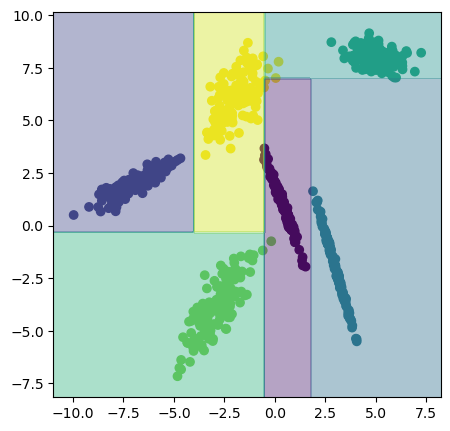

In [ ]:
if config.dataset == "test":
    print(model)
    test_labels = val_dataset[1]
    pred_labels = model.predict(val_dataset[0])
    # print((pred_labels==test_labels))
    # plot_test(*val_dataset, pred = pred_labels,clf=model)
    plot_test(*train_dataset, pred = model.predict(train_dataset[0]),clf=model)
    model.score(*val_dataset)
    tree = model.trees[0].root.child[0]
    # print(root.CCA.A,root.CCA.B)
    ## plot root.CCA, transform val_dataset
    # print(tree.a)
    # plot_test((val_dataset[0][:,tree.choices].dot(tree.a)),val_dataset[1])